<a href="https://colab.research.google.com/github/hugosousa111/segmentacao_base_ph2/blob/main/exemplos_amostras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações e Bibliotecas

In [1]:
# Acessa o Drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal as sg
import cv2 as cv
import warnings
warnings.filterwarnings("ignore") 
import os
from IPython.display import clear_output
import pandas as pd
from collections import deque

# Funções Auxiliares

In [3]:
def plota(image, text="Imagem", colorida=False):
    fig = plt.figure(figsize=(9,3), dpi=100)
    a = fig.add_subplot(1,3,1)
    a.axis('off')
    if not colorida:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image[:,:,::-1])  #img colorida
    a.set_title(text)
    plt.show()

def just_save(image, caminho="", nome="name",  colorida=False):
    dpi = 80

    if not colorida:
        height, width = image.shape

        figsize = width / float(dpi), height / float(dpi)

        fig = plt.figure(figsize=figsize)
        ax = fig.add_axes([0, 0, 1, 1])
        ax.axis('off')

        ax.imshow(image, cmap=plt.cm.gray)
    else:
        height, width, nbands = image.shape

        figsize = width / float(dpi), height / float(dpi)

        fig = plt.figure(figsize=figsize)
        ax = fig.add_axes([0, 0, 1, 1])

        ax.axis('off')

        ax.imshow(image[:,:,::-1])
    ax.set(xlim=[-0.5, width - 0.5], ylim=[height - 0.5, -0.5], aspect=1)

    fig.savefig('/content/drive/My Drive/PH2_TCC/'+caminho+'/'+nome, dpi=dpi, transparent=True)
    plt.close(fig)
        
def salva_contexto(array, nome_array, j_d): 
    arq = open('/content/drive/My Drive/PH2_TCC/variaveis_'+j_d+'/'+nome_array+'.txt', 'w')
    np.savetxt(arq, array)
    arq.close()

In [4]:
def get_names_images():
    filenames= os.listdir ("/content/drive/My Drive/PH2Dataset/PH2 Dataset images") # get all files' and folders' names in the current directory

    result = []
    for filename in filenames: # loop through all the files and folders
        if os.path.isdir(os.path.join(os.path.abspath("/content/drive/My Drive/PH2Dataset/PH2 Dataset images"), filename)): # check whether the current object is a folder or not
            result.append(filename)        
    result.sort()
    return result

imagens = get_names_images()
#imagens = imagens[0:30]
#imagens

In [5]:
def carrega_imagem_original(image, color=0):
    img = cv.imread('/content/drive/My Drive/PH2Dataset/PH2 Dataset images/'+image+'/'+image+'_Dermoscopic_Image/'+image+'.bmp', color)
    return img

def carrega_imagem_lesion(image, color=0):
    img = cv.imread('/content/drive/My Drive/PH2Dataset/PH2 Dataset images/'+image+'/'+image+'_lesion/'+image+'_lesion.bmp', color)
    return img
    
def carrega_imagem_processada(image, color=0):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Pre_Processadas_Black_Hat/'+image+'.png', color)
    return img

def carrega_Resultados_NPre_kmeans_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_kmeans_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_kmeans_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_kmeans_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_kmeans_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_kmeans_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_kmeans_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_kmeans_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_Otsu_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_Otsu_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_Otsu_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_Otsu_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_Otsu_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_Otsu_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_Otsu_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_Otsu_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_binarizacao_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_binarizacao_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_binarizacao_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_binarizacao_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_binarizacao_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_binarizacao_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_binarizacao_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_binarizacao_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_tudo_branco(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_tudo_branco/'+image+'.png', 0)
    return img

def carrega_Resultados_tudo_preto(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_tudo_preto/'+image+'.png', 0)
    return img

def carrega_Resultados_tudo_com_filtro(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_tudo_com_filtro/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_binarizacao_adptativa_gauss_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_binarizacao_adptativa_gauss_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_binarizacao_adptativa_gauss_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_binarizacao_adptativa_gauss_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_binarizacao_adptativa_gauss_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_binarizacao_adptativa_gauss_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_binarizacao_adptativa_gauss_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_binarizacao_adptativa_gauss_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_binarizacao_adptativa_mean_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_binarizacao_adptativa_mean_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_binarizacao_adptativa_mean_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_binarizacao_adptativa_mean_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_binarizacao_adptativa_mean_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_binarizacao_adptativa_mean_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_binarizacao_adptativa_mean_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_binarizacao_adptativa_mean_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_crescimento_de_regiao_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_crescimento_de_regiao_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_crescimento_de_regiao_Pos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_crescimento_de_regiao_Pos/'+image+'.png', 0)
    return img

def carrega_Resultados_Pre_crescimento_de_regiao_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_Pre_crescimento_de_regiao_NPos/'+image+'.png', 0)
    return img

def carrega_Resultados_NPre_crescimento_de_regiao_NPos(image):
    img = cv.imread('/content/drive/My Drive/PH2_TCC/Resultados_NPre_crescimento_de_regiao_NPos/'+image+'.png', 0)
    return img


# Pré Processamento

In [6]:
def pre_processamento_blackhat(src, plot=0):
    grayScale = cv.cvtColor( src, cv.COLOR_RGB2GRAY )

    kernel = cv.getStructuringElement(1,(15,15))
    blackhat = cv.morphologyEx(grayScale, cv.MORPH_BLACKHAT, kernel)

    ret,thresh2 = cv.threshold(blackhat,10,255,cv.THRESH_BINARY)
    
    dst = cv.inpaint(src,thresh2,1,cv.INPAINT_TELEA)
    if plot==1: 
        plota(grayScale, "")
        just_save(grayScale, caminho="outros", nome="grayScale",  colorida=False)
    
        plota(blackhat, "")
        just_save(blackhat, caminho="outros", nome="blackhat",  colorida=False)

        plota(thresh2, "")
        just_save(thresh2, caminho="outros", nome="thresh2",  colorida=False)
    return dst

# Segmentadores

In [7]:
def segmentacao_kmeans(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    try:
        Z = img.reshape((-1,3))
    except:
        try:
            Z = img.reshape((-1,2))
        except:
            Z = img.reshape((-1,1))
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    res2 = cv.bitwise_not(res2)
    kernel = np.ones((3,3),np.uint8)
    res2 = cv.morphologyEx(res2,cv.MORPH_CLOSE,kernel, iterations = 2)
    return res2

In [8]:
def segmentacao_otsu(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    return thresh

In [9]:
def segmentacao_binarizacao(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    metodo = cv.THRESH_BINARY_INV
    ret, imgBinarizada = cv.threshold(img, 145, 255, metodo)
    return imgBinarizada

In [10]:
def segmentacao_binarizacao_adptativa_gauss(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)    
    imgBinarizada = cv.adaptiveThreshold(img, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY_INV, 751, 20)
    return imgBinarizada

In [11]:
def segmentacao_binarizacao_adptativa_mean(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)    
    imgBinarizada = cv.adaptiveThreshold(img, 255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV, 751, 20)
    return imgBinarizada

## Crescimento de Região

In [12]:
def obterSemente(image):
    w, h = image.shape 
    semente = np.zeros((w, h)) 
    semente[:, :3] = 255
    semente[:, (h-3):] = 255
    return semente

In [13]:
def vizinhos(x, y, w, h):
    lista = deque()
    pontos = [(x-1,y), (x+1, y), (x,y-1), (x,y+1),
              (x-1,y+1), (x+1, y+1), (x-1,y-1), (x+1,y-1),
             ]
    for p in pontos:
        if (p[0]>=0 and p[1]>=0 and p[0]<w and p[1]<h):
            lista.append((p[0], p[1]))          
    return lista
    
def crescerRegiao(image, reg, epsilon=5):
    w, h = image.shape
    fila = deque()
    for x in range(w):
        for y in range(h):
            if reg[x,y]==255:
                fila.append((x,y))
    while fila: 
        ponto = fila.popleft()
        x = ponto[0]
        y = ponto[1]
        v_list = vizinhos(x, y, w, h)
        for v in v_list:
            v_x = v[0]
            v_y = v[1]
            if( (reg[v_x][v_y]!=255) and (abs(image[x][y]-image[v_x][v_y])<epsilon)):
                reg[v_x][v_y] = 255
                fila.append((v_x,v_y))
    return reg
    
def inv_img (img):
    h, w = img.shape
    for i in  range(h):
        for j in  range(w):
            if img[i, j] == 0:
                img[i, j] = 255
            else:
                img[i, j] = 0
    return img

In [14]:
def segmentacao_crescimento_de_regiao(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    semente = obterSemente(img)
    media = [[1./13., 1./13., 1./13.], 
            [1./13., 1./13., 1./13.],
            [1./13., 1./13., 1./13.]]
    c_media = sg.convolve(img, media, "valid")
    v = 0.55
    regiao = crescerRegiao(c_media, semente, epsilon=v)
    regiao = inv_img(regiao)
    regiao = regiao.astype(np.uint8)
    regiao = cv.medianBlur(regiao,21)
    return regiao

## Controle:

In [15]:
def segmentacao_tudo_branco(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    (height,width) = img.shape
    seg = np.ones((height,width), np.uint8)*255
    #plota(filtro, "AAAA")
    (a, b) = seg.shape
    a = a//2
    b = b//2
    
    cv.circle(seg,(b, a), 0, (0,0,0), -1)

    #plota(seg)
    return seg

In [16]:
def segmentacao_tudo_preto(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    (height,width) = img.shape
    seg = np.zeros((height,width), np.uint8)
    return seg

# Pós Processamento e Filtro dos cantos

In [17]:
def pos_processamento(img):
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(img,cv.MORPH_CLOSE,kernel, iterations = 2)
    sure_bg = cv.dilate(opening,kernel,iterations=3)
    regiao4 = cv.medianBlur(sure_bg,9)
    return regiao4

In [18]:
def cria_filtro(img):
    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY )
    (height,width) = img.shape
    filtro = np.ones((height,width), np.uint8)*255
    (a, b) = filtro.shape
    a = a//2
    b = b//2
    cv.circle(filtro,(b, a), 320, (0,0,0), -1)
    return filtro

In [19]:
def removedor_cantos_filtro(img, filtro):
    (a, b) = img.shape
    for i in range(0,a):
        for j in range(0,b):
            if filtro[i,j] == 0:
                break
            img[i,j] = 0
    for i in range(0,a):
        for j in range(b-1,-1,-1):
            if filtro[i,j] == 0:
                break
            img[i,j] = 0
    return img

# Aplicação

In [20]:
imagens = get_names_images()

## Aplicação Kmeans

In [21]:
def Resultados_kmeans(img, filtro, tipo_pos = 0):
    img_seg = segmentacao_kmeans(img)
    if tipo_pos == 0:
        img_pos = pos_processamento(img_seg)
    elif tipo_pos == 1:
        img_pos = img_seg
    img_final = removedor_cantos_filtro(img_pos, filtro)
    c = np.unique(img_final)
    (a, b) = img_final.shape
    for i in range(0,a):
        for j in range(0,b):
                if img_final[i,j] == c[-1]:
                    img_final[i,j] = 255
                else: 
                    img_final[i,j] = 0
    return img_final

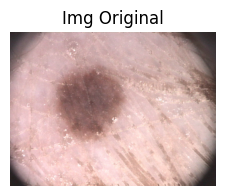

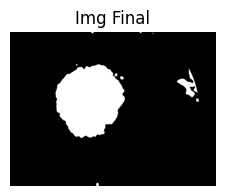

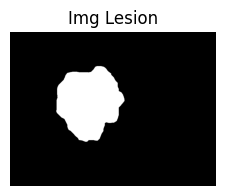

In [22]:
img_name = imagens[1] 
img = carrega_imagem_original(img_name, 1) #NPRE
img = carrega_imagem_processada(img_name, 1) #PRE
plota(img, "Img Original", True)

filtro = cria_filtro(img)

img2 = Resultados_kmeans(img, filtro)
plota(img2, "Img Final")

img_lesion = carrega_imagem_lesion(img_name)
plota(img_lesion, "Img Lesion")

## Aplicação Otsu

In [23]:
def Resultados_Otsu(img, filtro, tipo_pos = 0, sem_filtro = 0):
    img_seg = segmentacao_otsu(img)
    if tipo_pos == 0:
        img_pos = pos_processamento(img_seg)
    elif tipo_pos == 1:
        img_pos = img_seg
    if sem_filtro == 1: 
        return img_pos    
    img_final = removedor_cantos_filtro(img_pos, filtro)
    return img_final

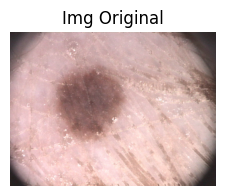

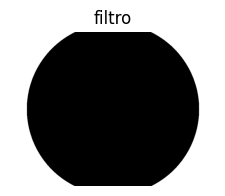

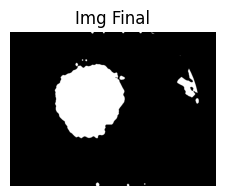

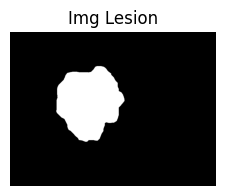

In [24]:
img_name = imagens[1] 
#img = carrega_imagem_original(img_name, 1) #NPRE
img = carrega_imagem_processada(img_name, 1) #PRE
plota(img, "Img Original", True)

filtro = cria_filtro(img)
plota(filtro, 'filtro')
img2 = Resultados_Otsu(img, filtro)
plota(img2, "Img Final")

img_lesion = carrega_imagem_lesion(img_name)
plota(img_lesion, "Img Lesion")

## Aplicação Binarização

In [25]:
def Resultados_binarizacao(img, filtro, tipo_pos = 0):
    img_seg = segmentacao_binarizacao(img)
    if tipo_pos == 0:
        img_pos = pos_processamento(img_seg)
    elif tipo_pos == 1:
        img_pos = img_seg
    img_final = removedor_cantos_filtro(img_pos, filtro)
    return img_final

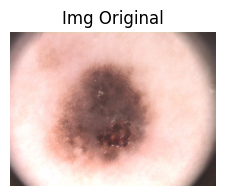

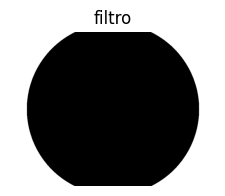

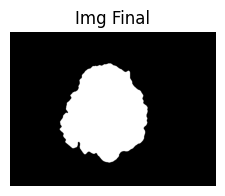

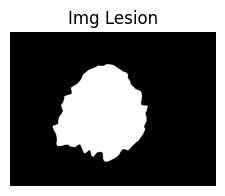

In [26]:
img_name = imagens[2] 
img = carrega_imagem_original(img_name, 1) #NPRE
img = carrega_imagem_processada(img_name, 1) #PRE
plota(img, "Img Original", True)

filtro = cria_filtro(img)
plota(filtro, 'filtro')
img2 = Resultados_binarizacao(img, filtro)
plota(img2, "Img Final")

img_lesion = carrega_imagem_lesion(img_name)
plota(img_lesion, "Img Lesion")

## Aplicação Bin Adap Gauss

In [27]:
def Resultados_binarizacao_adptativa_gauss(img, filtro, tipo_pos = 0):
    img_seg = segmentacao_binarizacao_adptativa_gauss(img)
    if tipo_pos == 0:
        img_pos = pos_processamento(img_seg)
    elif tipo_pos == 1:
        img_pos = img_seg
    img_final = removedor_cantos_filtro(img_pos, filtro)
    return img_final

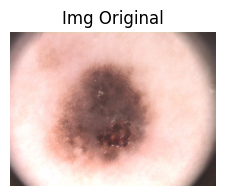

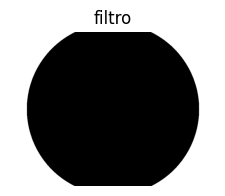

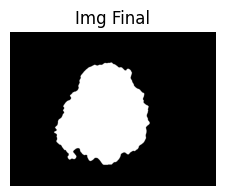

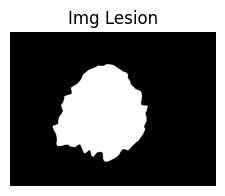

In [28]:
img_name = imagens[2] 
img = carrega_imagem_original(img_name, 1) #NPRE
img = carrega_imagem_processada(img_name, 1) #PRE
plota(img, "Img Original", True)

filtro = cria_filtro(img)
plota(filtro, 'filtro')
img2 = Resultados_binarizacao_adptativa_gauss(img, filtro)
plota(img2, "Img Final")

img_lesion = carrega_imagem_lesion(img_name)
plota(img_lesion, "Img Lesion")

## Aplicação Bin Adap Mean

In [29]:
def Resultados_binarizacao_adptativa_mean(img, filtro, tipo_pos = 0):
    img_seg = segmentacao_binarizacao_adptativa_mean(img)
    if tipo_pos == 0:
        img_pos = pos_processamento(img_seg)
    elif tipo_pos == 1:
        img_pos = img_seg
    img_final = removedor_cantos_filtro(img_pos, filtro)
    return img_final

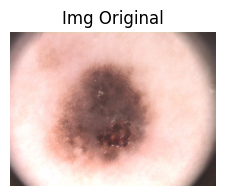

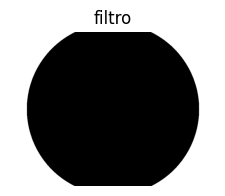

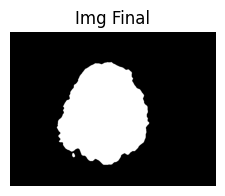

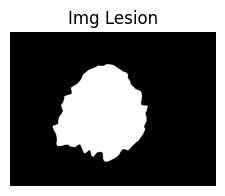

In [30]:
img_name = imagens[2] 
img = carrega_imagem_original(img_name, 1) #NPRE
img = carrega_imagem_processada(img_name, 1) #PRE
plota(img, "Img Original", True)

filtro = cria_filtro(img)
plota(filtro, 'filtro')
img2 = Resultados_binarizacao_adptativa_mean(img, filtro)
plota(img2, "Img Final")

img_lesion = carrega_imagem_lesion(img_name)
plota(img_lesion, "Img Lesion")

## Aplicação Crescimento de Região: 

In [31]:
def Resultados_crescimento_de_regiao(img, filtro, tipo_pos = 0):
    img_seg = segmentacao_crescimento_de_regiao(img)
    if tipo_pos == 0:
        img_pos = pos_processamento(img_seg)
    elif tipo_pos == 1:
        img_pos = img_seg
    img_final = removedor_cantos_filtro(img_pos, filtro)
    return img_final

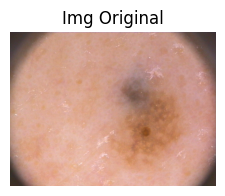

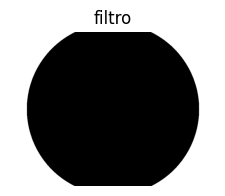

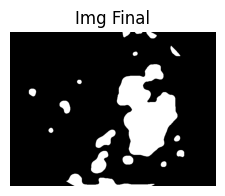

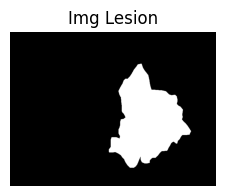

In [32]:
img_name = imagens[3] 
img = carrega_imagem_original(img_name, 1) #NPRE
img = carrega_imagem_processada(img_name, 1) #PRE
plota(img, "Img Original", True)

filtro = cria_filtro(img)
plota(filtro, 'filtro')
img2 = Resultados_crescimento_de_regiao(img, filtro)
plota(img2, "Img Final")

img_lesion = carrega_imagem_lesion(img_name)
plota(img_lesion, "Img Lesion")

## Controle: 

### Aplicação Tudo Branco

In [33]:
def Resultados_tudo_branco(img):
    img_seg = segmentacao_tudo_branco(img)
    return img_seg

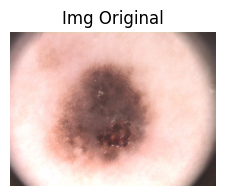

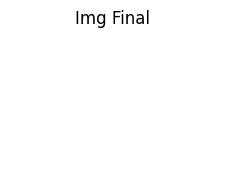

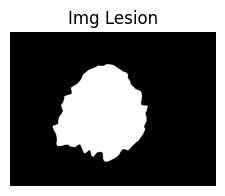

In [34]:
img_name = imagens[2] 
img = carrega_imagem_original(img_name, 1) #NPRE
img = carrega_imagem_processada(img_name, 1) #PRE
plota(img, "Img Original", True)

img2 = Resultados_tudo_branco(img)
plota(img2, "Img Final")
img_lesion = carrega_imagem_lesion(img_name)
plota(img_lesion, "Img Lesion")

### Aplicação tudo preto


In [35]:
def Resultados_tudo_preto(img):
    img_seg = segmentacao_tudo_preto(img)
    return img_seg

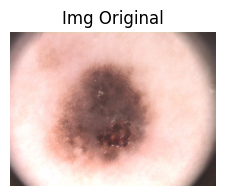

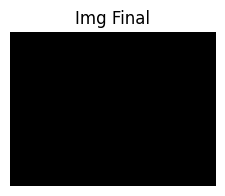

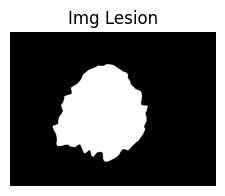

In [36]:
img_name = imagens[2] 
img = carrega_imagem_original(img_name, 1) #NPRE
img = carrega_imagem_processada(img_name, 1) #PRE
plota(img, "Img Original", True)

img2 = Resultados_tudo_preto(img)
plota(img2, "Img Final")
img_lesion = carrega_imagem_lesion(img_name)
plota(img_lesion, "Img Lesion")

### Aplicação Tudo com filtro

In [37]:
# Aplicação Resultados_Pre_tudo_com_filtro_Pos_RCan
def Resultados_tudo_com_filtro(img,filtro):
    img_seg = segmentacao_tudo_branco(img)
    img_final = removedor_cantos_filtro(img_seg, filtro)
    return img_final

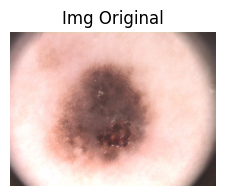

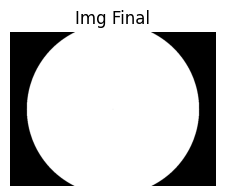

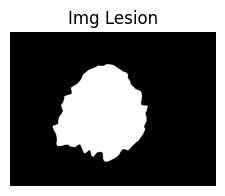

In [38]:
img_name = imagens[2] 
img = carrega_imagem_original(img_name, 1) #NPRE
img = carrega_imagem_processada(img_name, 1) #PRE
plota(img, "Img Original", True)

filtro = cria_filtro(img)

img2 = Resultados_tudo_com_filtro(img, filtro)
plota(img2, "Img Final")
img_lesion = carrega_imagem_lesion(img_name)
plota(img_lesion, "Img Lesion")

# JACCARD E DICE

## Métodos

In [39]:
# JACCARD E DICE

#jaccard(A,B) = TP / (TP + FP + FN)
def jaccard_TF(A, B):
    TP = 0
    FP = 0
    FN = 0

    li, co = A.shape

    for l in range(0,li):
        for c in range(0,co):
            if A[l,c] == B[l,c]: 
                if A[l,c] == 255:
                    TP = TP + 1
            else: 
                if A[l,c] == 255:
                    FN = FN+1
                else:
                    FP = FP+1

    jaccard =  TP / (TP + FP + FN)

    return jaccard

#dice(A,B) = 2TP / (2TP + FP + FN)
def dice_TF(A, B):
    TP = 0
    FP = 0
    FN = 0

    li, co = A.shape

    for l in range(0,li):
        for c in range(0,co):
            if A[l,c] == B[l,c]: 
                if A[l,c] == 255:
                    TP = TP + 1
            else: 
                if A[l,c] == 255:
                    FN = FN+1
                else:
                    FP = FP+1

    dice =  (2*TP) / ((2*TP) + FP + FN)
    return dice


## Kmeans

In [40]:
def Jaccard_kmeans_array(imagens, tipo=0): 
    leng = len(imagens)
    jacc = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_kmeans_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1
        
    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_kmeans_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_kmeans_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_kmeans_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    clear_output() 
    return jacc

In [41]:
def Dice_kmeans_array(imagens, tipo=0): 
    leng = len(imagens)
    dice = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_kmeans_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1
        
    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_kmeans_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_kmeans_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_kmeans_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    clear_output()        
    return dice      

## OTSU

In [42]:
def Jaccard_otsu_array(imagens, tipo=0): 
    leng = len(imagens)
    jacc = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_Otsu_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_Otsu_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_Otsu_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_Otsu_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    clear_output() 
    return jacc

In [43]:
def Dice_otsu_array(imagens, tipo=0): 
    leng = len(imagens)
    dice = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_Otsu_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_Otsu_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_Otsu_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_Otsu_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    clear_output()        
    return dice     

## Binarizacao

In [44]:
def Jaccard_binarizacao_array(imagens, tipo=0): 
    leng = len(imagens)
    jacc = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    clear_output() 
    return jacc

In [45]:
def Dice_binarizacao_array(imagens, tipo=0): 
    leng = len(imagens)
    dice = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    clear_output()        
    return dice     


## Bin Adap Gauss

In [46]:
def Jaccard_binarizacao_adptativa_gauss_array(imagens, tipo=0): 
    leng = len(imagens)
    jacc = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_adptativa_gauss_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_adptativa_gauss_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_adptativa_gauss_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_adptativa_gauss_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    clear_output() 
    return jacc

In [47]:
def Dice_binarizacao_adptativa_gauss_array(imagens, tipo=0): 
    leng = len(imagens)
    dice = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_adptativa_gauss_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_adptativa_gauss_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_adptativa_gauss_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_adptativa_gauss_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    clear_output()        
    return dice     


## Bin Adap Mean

In [48]:
def Jaccard_binarizacao_adptativa_mean_array(imagens, tipo=0): 
    leng = len(imagens)
    jacc = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_adptativa_mean_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_adptativa_mean_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_adptativa_mean_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_adptativa_mean_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    clear_output() 
    return jacc

In [49]:
def Dice_binarizacao_adptativa_mean_array(imagens, tipo=0): 
    leng = len(imagens)
    dice = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_adptativa_mean_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_adptativa_mean_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_binarizacao_adptativa_mean_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_binarizacao_adptativa_mean_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    clear_output()        
    return dice     

## Crescimento de região

In [50]:
def Jaccard_crescimento_de_regiao_array(imagens, tipo=0): 
    leng = len(imagens)
    jacc = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_crescimento_de_regiao_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_crescimento_de_regiao_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_crescimento_de_regiao_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_crescimento_de_regiao_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    clear_output() 
    return jacc

In [51]:
def Dice_crescimento_de_regiao_array(imagens, tipo=0): 
    leng = len(imagens)
    dice = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_crescimento_de_regiao_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 1:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_crescimento_de_regiao_Pos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 2:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_Pre_crescimento_de_regiao_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    elif tipo == 3:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_NPre_crescimento_de_regiao_NPos(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    clear_output()        
    return dice     

## Controle: 

In [52]:
def Jaccard_tudo_branco_array(imagens, tipo=0): 
    leng = len(imagens)
    jacc = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_tudo_branco(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    clear_output() 
    return jacc

In [53]:
def Dice_tudo_branco_array(imagens, tipo=0): 
    leng = len(imagens)
    dice = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_tudo_branco(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    clear_output()        
    return dice     


In [54]:
def Jaccard_tudo_preto_array(imagens, tipo=0): 
    leng = len(imagens)
    jacc = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_tudo_preto(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    clear_output() 
    return jacc

In [55]:
def Dice_tudo_preto_array(imagens, tipo=0): 
    leng = len(imagens)
    dice = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_tudo_preto(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    clear_output()        
    return dice     


In [56]:
def Jaccard_tudo_com_filtro_array(imagens, tipo=0): 
    leng = len(imagens)
    jacc = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_tudo_com_filtro(img_nome)
            A = carrega_imagem_lesion(img_nome)
            j = jaccard_TF(A,B)
            jacc[cont] = j
            cont = cont+1

    clear_output() 
    return jacc

In [57]:
def Dice_tudo_com_filtro_array(imagens, tipo=0): 
    leng = len(imagens)
    dice = np.zeros(leng)
    cont = 0
    if tipo == 0:
        for img_nome in imagens:
            print(img_nome+' ...')
            B = carrega_Resultados_tudo_com_filtro(img_nome)
            A = carrega_imagem_lesion(img_nome)
            d = dice_TF(A,B)
            dice[cont] = d
            cont = cont+1

    clear_output()        
    return dice     


# Exemplos

In [58]:
imagens = get_names_images()

IMD003 ...


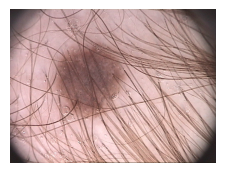

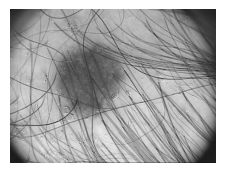

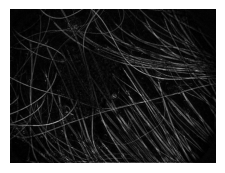

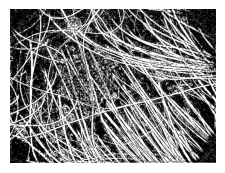

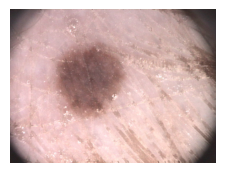

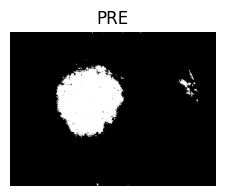

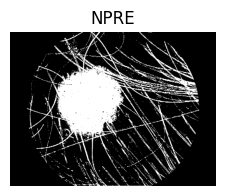

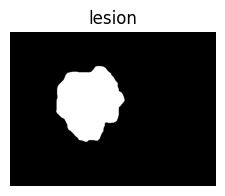

PRE
Jaccard =>  0.8594059405940594
Dice =>  0.9243876464323749
NPRE
Jaccard =>  0.5013053679815817
Dice =>  0.6678259848701636


In [59]:
# Fase de pré-processamento
img_nome = imagens[1]
print(img_nome+' ...')
img = carrega_imagem_original(img_nome, 1)
plota(img, "", True)
just_save(img, caminho="outros", nome="img",  colorida=True)

img_pre = pre_processamento_blackhat(img, 1)
plota(img_pre, "", True)
just_save(img_pre, caminho="outros", nome="img_pre",  colorida=True)

### P_NP
filtro = cria_filtro(img_pre)
img_seg_p = Resultados_Otsu(img_pre, filtro, 1)
plota(img_seg_p, "PRE")
just_save(img_seg_p, caminho="outros", nome="img_seg_p")

#### NP_NP
filtro = cria_filtro(img)
img_pre_np = Resultados_Otsu(img, filtro, 1)
plota(img_pre_np, "NPRE")
just_save(img_pre_np,caminho="outros", nome="img_pre_np")    

#### Lesion
lesion = carrega_imagem_lesion(img_nome)
plota(lesion , "lesion")
just_save(lesion,caminho="outros", nome="lesion")    

## JACCARD
print("PRE")
j = jaccard_TF(lesion,img_seg_p)
print('Jaccard => ', j)
d = dice_TF(lesion,img_seg_p)
print('Dice => ', d)
print("NPRE")
j = jaccard_TF(lesion,img_pre_np)
print('Jaccard => ', j)
d = dice_TF(lesion,img_pre_np)
print('Dice => ', d)

IMD018 ...


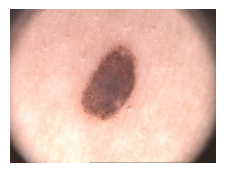

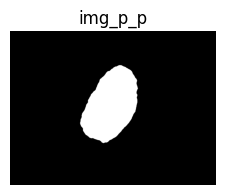

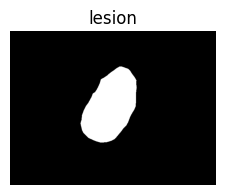

Jaccard =>  0.9340067660932958
Dice =>  0.9658774544827416


In [60]:
img_nome = imagens[12] # 12 bom # 35 ruim
print(img_nome+' ...')

img = carrega_imagem_original(img_nome, 1)
plota(img, "", True)
just_save(img, caminho="outros", nome="img",  colorida=True)

#### img_p_p
img_p_p = carrega_Resultados_Pre_Otsu_Pos(img_nome)
plota(img_p_p , "img_p_p")
just_save(img_p_p,caminho="outros", nome="img_p_p")    

#### Lesion
lesion = carrega_imagem_lesion(img_nome)
plota(lesion , "lesion")
just_save(lesion,caminho="outros", nome="lesion")    

## JACCARD
j = jaccard_TF(lesion,img_p_p)
print('Jaccard => ', j)
d = dice_TF(lesion,img_p_p)
print('Dice => ', d)

IMD280 ...


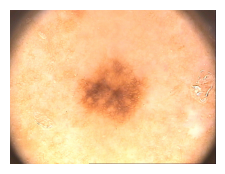

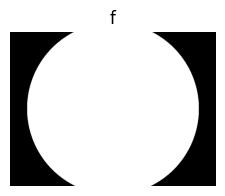

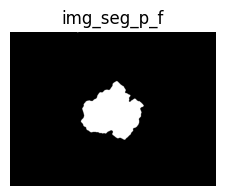

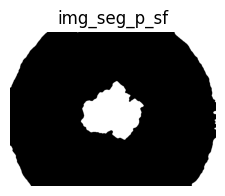

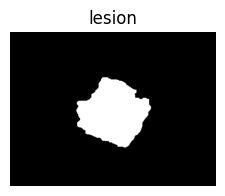

img_seg_p_f
Jaccard =>  0.6624504918870576
Dice =>  0.79695665539502
img_seg_p_sf
PRE
Jaccard =>  0.3503062787136294
Dice =>  0.5188545506095832


In [61]:
# Fase de pré-processamento
img_nome = imagens[123]
print(img_nome+' ...')
img = carrega_imagem_original(img_nome, 1)
plota(img, "", True)
just_save(img, caminho="outros", nome="img",  colorida=True)

img_pre = pre_processamento_blackhat(img)
#plota(img_pre, "", True)
#just_save(img_pre, caminho="outros", nome="img_pre",  colorida=True)

### P_NP
filtro = cria_filtro(img_pre)
f = cv.bitwise_not(filtro)
plota(f, "f")
just_save(f, caminho="outros", nome="f")

img_seg_p_f = Resultados_Otsu(img_pre, filtro, 0,0)
plota(img_seg_p_f, "img_seg_p_f")
just_save(img_seg_p_f, caminho="outros", nome="img_seg_p_f")

img_seg_p_sf = Resultados_Otsu(img_pre, filtro, 0,1)
plota(img_seg_p_sf, "img_seg_p_sf")
just_save(img_seg_p_sf, caminho="outros", nome="img_seg_p_sf")


#### Lesion
lesion = carrega_imagem_lesion(img_nome)
plota(lesion , "lesion")
just_save(lesion,caminho="outros", nome="lesion")    

## JACCARD
print("img_seg_p_f")
j = jaccard_TF(lesion,img_seg_p_f)
print('Jaccard => ', j)
d = dice_TF(lesion,img_seg_p_f)
print('Dice => ', d)
print("img_seg_p_sf")
print("PRE")
j = jaccard_TF(lesion,img_seg_p_sf)
print('Jaccard => ', j)
d = dice_TF(lesion,img_seg_p_sf)
print('Dice => ', d)

IMD182 ...


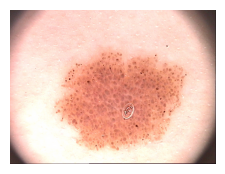

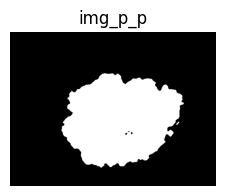

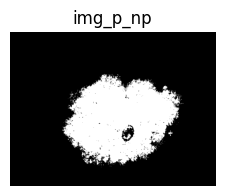

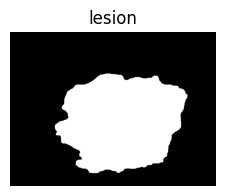

Jaccard =>  0.8400538834806942
Dice =>  0.9130753083074136
Jaccard =>  0.7104571024103118
Dice =>  0.8307219180290022


In [62]:
img_nome = imagens[100] # 19
print(img_nome+' ...')

img = carrega_imagem_original(img_nome, 1)
plota(img, "", True)
just_save(img, caminho="outros", nome="img",  colorida=True)

#### img_p_p
img_p_p = carrega_Resultados_Pre_Otsu_Pos(img_nome)
plota(img_p_p , "img_p_p")
just_save(img_p_p,caminho="outros", nome="img_p_p")    

#### img_p_np
img_p_np = carrega_Resultados_Pre_Otsu_NPos(img_nome)
plota(img_p_np , "img_p_np")
just_save(img_p_np,caminho="outros", nome="img_p_np")

#### Lesion
lesion = carrega_imagem_lesion(img_nome)
plota(lesion , "lesion")
just_save(lesion,caminho="outros", nome="lesion")    

## JACCARD
j = jaccard_TF(lesion,img_p_p)
print('Jaccard => ', j)
d = dice_TF(lesion,img_p_p)
print('Dice => ', d)
## JACCARD
j = jaccard_TF(lesion,img_p_np)
print('Jaccard => ', j)
d = dice_TF(lesion,img_p_np)
print('Dice => ', d)

IMD016 ...
(576, 767, 3)


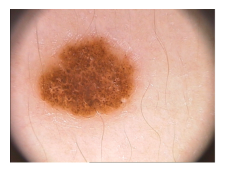

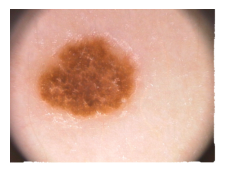

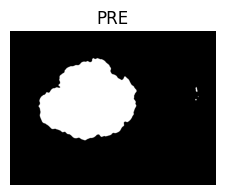

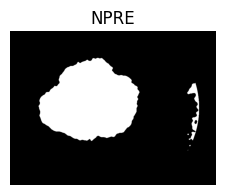

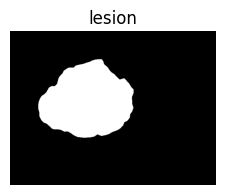

PRE
Jaccard =>  0.935520026796872
Dice =>  0.966685969501521
NPRE
Jaccard =>  0.856947031738779
Dice =>  0.9229633555420957


In [63]:
# Fase de pré-processamento
img_nome = imagens[10]
print(img_nome+' ...')
print(img.shape)
img = carrega_imagem_original(img_nome, 1)
plota(img, "", True)
just_save(img, caminho="outros", nome="img",  colorida=True)

img_pre = pre_processamento_blackhat(img)
plota(img_pre, "", True)
just_save(img_pre, caminho="outros", nome="img_pre",  colorida=True)

### P_NP
filtro = cria_filtro(img_pre)
img_seg_p = Resultados_binarizacao_adptativa_gauss(img_pre, filtro)
plota(img_seg_p, "PRE")
just_save(img_seg_p, caminho="outros", nome="img_seg_p")

#### NP_NP
filtro = cria_filtro(img)
img_pre_np = Resultados_binarizacao_adptativa_mean(img_pre, filtro)
plota(img_pre_np, "NPRE")
just_save(img_pre_np,caminho="outros", nome="img_pre_np")    

#### Lesion
lesion = carrega_imagem_lesion(img_nome)
plota(lesion , "lesion")
just_save(lesion,caminho="outros", nome="lesion")    

## JACCARD
print("PRE")
j = jaccard_TF(lesion,img_seg_p)
print('Jaccard => ', j)
d = dice_TF(lesion,img_seg_p)
print('Dice => ', d)
print("NPRE")
j = jaccard_TF(lesion,img_pre_np)
print('Jaccard => ', j)
d = dice_TF(lesion,img_pre_np)
print('Dice => ', d)